Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

https://docs.nvidia.com/deeplearning/performance/mixed-precision-training/index.html

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Data/Train")
data_dir_test = pathlib.Path('Data/Test')

In [4]:
print('Classes available for training')
print('+++++++++++++++++++++++++++++++')
os.listdir(data_dir_train)

Classes available for training
+++++++++++++++++++++++++++++++


['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(f'Total Images available for training: {image_count_train}')
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(f'Total Images available for testing: {image_count_test}')


Total Images available for training: 2239
Total Images available for testing: 118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

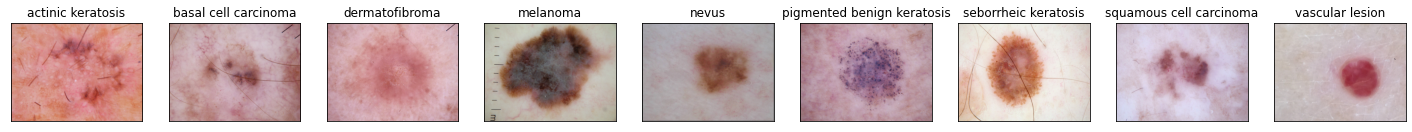

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,11))
for idx, image_class in enumerate(class_names):
    all_images_of_class = list(data_dir_train.joinpath(image_class).glob('*.jpg')) # List all the images for a particular class
    ax = fig.add_subplot(1, 9, 1 + idx, xticks=[], yticks=[])
    random_img_num = np.random.randint(len(all_images_of_class)) # Pick one random image of a class
    read_image = cv2.imread(str(all_images_of_class[random_img_num]))
    ax.set_title(image_class)
    plt.imshow(cv2.cvtColor(read_image, cv2.COLOR_BGR2RGB)) # Plot image in subplot


plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
num_classes = len(class_names)

# model = Sequential([
#   layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.BatchNormalization(),
#   layers.MaxPooling2D(),
#   layers.Dropout(0.25),
#   layers.Conv2D(128, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes,activation='softmax')
# ])

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function



model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 128)       36992     
_________________________________________________________________
batch_normalization (BatchNo (None, 90, 90, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 256)       2

### Train the model

In [15]:
epochs = 20

reducelr  = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.1, 
                              patience=10, 
                              verbose=0, 
                              mode='auto', 
                              min_delta=0.002, 
                              cooldown=0, 
                              min_lr=0)

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[reducelr]
)

Epoch 1/20
56/56 [==============================] - 168s 703ms/step - loss: 5.8404 - accuracy: 0.3276 - val_loss: 2.1796 - val_accuracy: 0.3423
Epoch 2/20
56/56 [==============================] - 15s 262ms/step - loss: 1.4311 - accuracy: 0.5150 - val_loss: 2.1530 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 12s 220ms/step - loss: 1.2899 - accuracy: 0.5396 - val_loss: 2.1328 - val_accuracy: 0.2550
Epoch 4/20
56/56 [==============================] - 4s 77ms/step - loss: 1.1894 - accuracy: 0.5919 - val_loss: 2.0692 - val_accuracy: 0.3535
Epoch 5/20
56/56 [==============================] - 4s 78ms/step - loss: 1.1023 - accuracy: 0.5944 - val_loss: 2.0947 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 4s 77ms/step - loss: 0.9554 - accuracy: 0.6677 - val_loss: 1.7977 - val_accuracy: 0.4072
Epoch 7/20
56/56 [==============================] - 4s 77ms/step - loss: 0.8002 - accuracy: 0.7209 - val_loss: 1.6930 - val_accuracy: 0.4452
Epoch 

### Visualizing training results

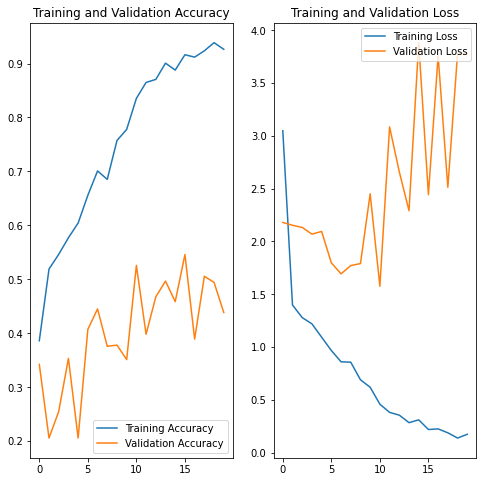

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')

plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### There is a clear evidence of model overfitting as there is considerable difference between the training accuracy and validation accuracy.

### The same trend can also be seen for the Training Loss and Validation Loss.

### When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples.

### Write your findings here

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomCrop(32, 32)
  ]
)

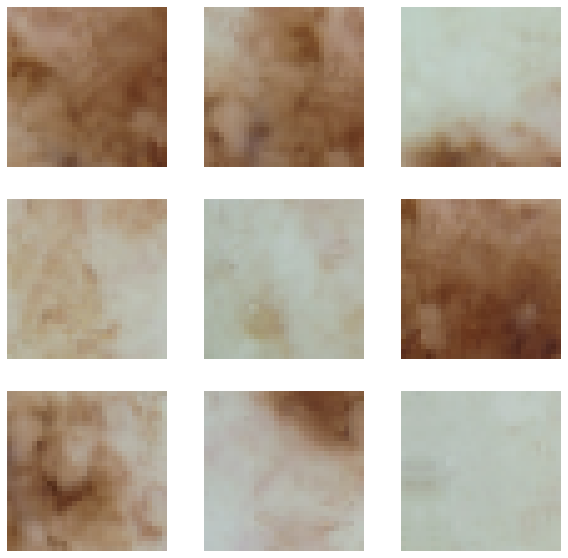

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # layers.Dropout(0.2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # layers.Dropout(0.3),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

### Compiling the model

In [20]:
## Your code goes here
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 32, 32, 3)         0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)        

### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20

reducelr  = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.1, 
                              patience=10, 
                              verbose=0, 
                              mode='auto', 
                              min_delta=0.002, 
                              cooldown=0, 
                              min_lr=0)

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[reducelr]
)

Epoch 1/20
56/56 [==============================] - 3s 25ms/step - loss: 2.0872 - accuracy: 0.1904 - val_loss: 2.0310 - val_accuracy: 0.1700
Epoch 2/20
56/56 [==============================] - 1s 14ms/step - loss: 2.0304 - accuracy: 0.1874 - val_loss: 2.0382 - val_accuracy: 0.2260
Epoch 3/20
56/56 [==============================] - 1s 14ms/step - loss: 1.9838 - accuracy: 0.2368 - val_loss: 1.8113 - val_accuracy: 0.2192
Epoch 4/20
56/56 [==============================] - 1s 12ms/step - loss: 1.8708 - accuracy: 0.2945 - val_loss: 1.9805 - val_accuracy: 0.2640
Epoch 5/20
56/56 [==============================] - 1s 14ms/step - loss: 1.8113 - accuracy: 0.3048 - val_loss: 1.8672 - val_accuracy: 0.3065
Epoch 6/20
56/56 [==============================] - 1s 13ms/step - loss: 1.8709 - accuracy: 0.2788 - val_loss: 1.7080 - val_accuracy: 0.3579
Epoch 7/20
56/56 [==============================] - 1s 13ms/step - loss: 1.7651 - accuracy: 0.3373 - val_loss: 1.7086 - val_accuracy: 0.3423
Epoch 8/20
56

### Visualizing the results

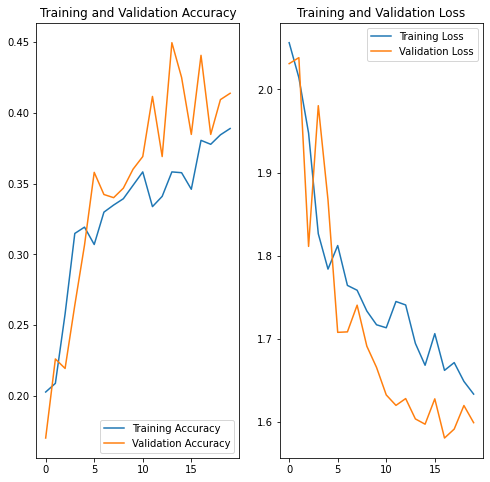

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

There is some improvement in the model in terms of generalization over the validation images.
The model does not overfit but the model seems to underfit as there are very few images for some classes. Although the validation accuracy and training accuracy are comparable both are suboptimal.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [23]:
## Your code goes here.
for image_class in class_names:
    n_images_per_class = len(list(data_dir_train.joinpath(image_class).glob('*.jpg')))
    print(f'No. of images for the class {image_class} is {n_images_per_class} ( {(n_images_per_class/image_count_train)*100:.2f} % of total images)')

No. of images for the class actinic keratosis is 114 ( 5.09 % of total images)
No. of images for the class basal cell carcinoma is 376 ( 16.79 % of total images)
No. of images for the class dermatofibroma is 95 ( 4.24 % of total images)
No. of images for the class melanoma is 438 ( 19.56 % of total images)
No. of images for the class nevus is 357 ( 15.94 % of total images)
No. of images for the class pigmented benign keratosis is 462 ( 20.63 % of total images)
No. of images for the class seborrheic keratosis is 77 ( 3.44 % of total images)
No. of images for the class squamous cell carcinoma is 181 ( 8.08 % of total images)
No. of images for the class vascular lesion is 139 ( 6.21 % of total images)


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
-   `seborrheic keratosis` has the least number of samples in the dataset.
#### - Which classes dominate the data in terms proportionate number of samples?
-   As per the above observation, `Melanoma` and `pigmented benign keratosis` have the highest proportion of images.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [24]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [25]:
os.listdir()

['Data', 'Starter_code_Assignment_CNN_Skin_Cancer.ipynb']

In [26]:
path_to_training_dataset = os.path.join('Data','Train')
print(path_to_training_dataset)
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + os.path.sep + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Data\Train


Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2429746B9D0>:   1%|          | 4/500 [00:00<01:19,  6.21 Samples/s]

Initialised with 114 image(s) found.
Output directory set to Data\Train\actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x24297530670>: 100%|██████████| 500/500 [00:02<00:00, 190.03 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2429753F460>:   2%|▏         | 9/500 [00:00<00:58,  8.39 Samples/s]

Initialised with 376 image(s) found.
Output directory set to Data\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x242986C9850>: 100%|██████████| 500/500 [00:02<00:00, 183.41 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x242986A98B0>:   3%|▎         | 14/500 [00:00<00:24, 19.51 Samples/s]

Initialised with 95 image(s) found.
Output directory set to Data\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2429869D550>: 100%|██████████| 500/500 [00:02<00:00, 172.72 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x242986C96D0>:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to Data\Train\melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x242974CCBB0>: 100%|██████████| 500/500 [00:13<00:00, 36.96 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x24297540F70>:   1%|          | 5/500 [00:00<00:11, 44.15 Samples/s]

Initialised with 357 image(s) found.
Output directory set to Data\Train\nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x24297F4FBB0>: 100%|██████████| 500/500 [00:11<00:00, 44.77 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2429869B1F0>:   3%|▎         | 13/500 [00:00<00:12, 39.09 Samples/s]

Initialised with 462 image(s) found.
Output directory set to Data\Train\pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2429753F100>: 100%|██████████| 500/500 [00:02<00:00, 178.82 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to Data\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2429869B430>: 100%|██████████| 500/500 [00:05<00:00, 85.89 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x242986C9FD0>:   3%|▎         | 13/500 [00:00<00:25, 19.01 Samples/s]

Initialised with 181 image(s) found.
Output directory set to Data\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24297455D60>: 100%|██████████| 500/500 [00:02<00:00, 179.62 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24298697CD0>:   3%|▎         | 16/500 [00:00<00:27, 17.48 Samples/s]

Initialised with 139 image(s) found.
Output directory set to Data\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24297536790>: 100%|██████████| 500/500 [00:02<00:00, 172.15 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [27]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [28]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['Data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_8cb30e5e-37f4-40b3-ad1c-3adddd721033.jpg',
 'Data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_94a4c325-a62a-4418-ae58-0f0309028c8d.jpg',
 'Data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_cf2e056b-9f5f-40ea-8b91-c1421400d6c3.jpg',
 'Data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_f7e9c004-24ec-4eb5-bf58-445076b56a77.jpg',
 'Data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_18a3d9fa-1439-4415-b824-d93655011c6f.jpg',
 'Data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_31071b4d-3dde-41f3-9781-2e997fa7736d.jpg',
 'Data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_7418879e-2634-4eaf-92d1-4e88a4f5ed48.jpg',
 'Data\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_78c0c731-3b

In [29]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [30]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [31]:
# df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# new_df = original_df.append(df2)

In [32]:
# new_df['Label'].value_counts()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [33]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [34]:
data_dir_train=   pathlib.Path("Data/Train") #"path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [35]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation", ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [53]:
## your code goes here

# model = Sequential([
#   data_augmentation,
#   layers.experimental.preprocessing.Rescaling(1./255),
#   layers.layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.layers.MaxPooling2D(),
#   layers.layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.layers.MaxPooling2D(),
#   layers.layers.BatchNormalization(),
#   layers.layers.Conv2D(128, 3, padding='same', activation='relu'),
#   layers.layers.MaxPooling2D(),
#   layers.layers.BatchNormalization(),
#   layers.layers.Conv2D(128, 3, padding='same', activation='relu'),
#   layers.layers.MaxPooling2D(),
#   layers.layers.Dropout(0.2),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])

model=Sequential([
    # data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.3),
    
    layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.3),
    
    layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.3),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),   
    layers.Dense(9, activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [54]:
## Your code goes here
# Mixed Precision FP16 training
os.environ['TF_ENABLE_AUTO_MIXED_PRECISION'] = '1'
# tf.keras.mixed_precision.set_global_policy('mixed_float16')

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
opt = tf.train.experimental.enable_mixed_precision_graph_rewrite(opt)

model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

  opt = tf.keras.mixed_precision.experimental.LossScaleOptimizer(opt)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_7 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 178, 178, 64)      18496     
_________________________________________________________________
batch_normalization_13 (Batc (None, 178, 178, 64)      256       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 89, 89, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 89, 89, 64)        0         
__________________________________________________

#### **Todo:**  Train your model

In [55]:
## Your code goes here, use 50 epochs.

epochs = 50

reducelr  = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.1, 
                              patience=5, 
                              verbose=0, 
                              mode='auto', 
                              min_delta=0.002, 
                              cooldown=0, 
                              min_lr=0)

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[reducelr]
)

Epoch 1/50
169/169 [==============================] - 63s 338ms/step - loss: 6.3367 - accuracy: 0.1921 - val_loss: 20.7392 - val_accuracy: 0.1099
Epoch 2/50
169/169 [==============================] - 55s 321ms/step - loss: 2.2054 - accuracy: 0.2173 - val_loss: 3.0745 - val_accuracy: 0.1455
Epoch 3/50
169/169 [==============================] - 56s 324ms/step - loss: 2.0763 - accuracy: 0.2300 - val_loss: 1.8976 - val_accuracy: 0.3177
Epoch 4/50
169/169 [==============================] - 58s 337ms/step - loss: 1.9995 - accuracy: 0.2439 - val_loss: 2.6329 - val_accuracy: 0.2695
Epoch 5/50
169/169 [==============================] - 56s 325ms/step - loss: 1.8851 - accuracy: 0.2527 - val_loss: 2.1990 - val_accuracy: 0.1618
Epoch 6/50
169/169 [==============================] - 55s 323ms/step - loss: 1.8580 - accuracy: 0.2840 - val_loss: 1.8793 - val_accuracy: 0.3229
Epoch 7/50
169/169 [==============================] - 55s 323ms/step - loss: 1.8408 - accuracy: 0.2750 - val_loss: 1.5620 - val_a

#### **Todo:**  Visualize the model results

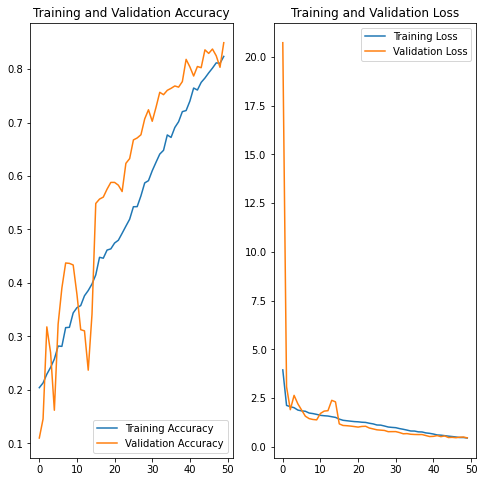

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### The results are comparatively better than previous experiments.
#### The problem of overfitting has been addressed as the gap between training and validatoin accuracies and
#### the training loss and validation loss has been narrowed down. The class imbalance seems to have helped in addressing the 
#### underfitting as well as the validation accuracy now stands at around `85%`.


In [57]:
model.save('skin_cancer_model_50_epoch_reduced_lr.h5')

In [58]:
loaded_model = tf.keras.models.load_model('skin_cancer_model_50_epoch_reduced_lr.h5')

In [59]:
loaded_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_7 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 178, 178, 64)      18496     
_________________________________________________________________
batch_normalization_13 (Batc (None, 178, 178, 64)      256       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 89, 89, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 89, 89, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 89, 89, 128)      

In [60]:
loaded_model.evaluate(train_ds)

169/169 [==============================] - 238s 1s/step - loss: 0.1896 - accuracy: 0.9325


[0.18958234786987305, 0.9324925541877747]

In [61]:
loaded_model.evaluate(val_ds)

43/43 [==============================] - 55s 1s/step - loss: 0.4511 - accuracy: 0.8493


[0.45108768343925476, 0.8492947220802307]

In [62]:
model = []

### Evaluate on Test set

In [75]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [77]:
y_pred = loaded_model.predict(test_ds)

In [79]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [84]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)

In [87]:
from sklearn.metrics import classification_report
print(classification_report(predicted_categories, true_categories))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.25      0.20      0.22        20
           2       0.06      0.14      0.09         7
           3       0.12      0.20      0.15        10
           4       0.44      0.16      0.23        45
           5       0.25      0.21      0.23        19
           6       0.00      0.00      0.00         1
           7       0.12      0.22      0.16         9
           8       0.00      0.00      0.00         3

    accuracy                           0.17       118
   macro avg       0.14      0.13      0.12       118
weighted avg       0.27      0.17      0.19       118



In [88]:
loaded_model.evaluate(test_ds)

4/4 [==============================] - 6s 159ms/step - loss: 4.4267 - accuracy: 0.4153


[4.426747798919678, 0.41525423526763916]